In [1]:
from google.colab import files
uploaded=files.upload()

Saving loan-risk-predictor-main.zip to loan-risk-predictor-main.zip


In [2]:
!unzip loan-risk-predictor-main.zip -d /content


Archive:  loan-risk-predictor-main.zip
9a09dd8f3db475c7ecc777e4c9b6b008d4545b60
   creating: /content/loan-risk-predictor-main/
 extracting: /content/loan-risk-predictor-main/.gitignore  
  inflating: /content/loan-risk-predictor-main/21.csv  
   creating: /content/loan-risk-predictor-main/IntClasses/
   creating: /content/loan-risk-predictor-main/IntClasses/MinMax/
  inflating: /content/loan-risk-predictor-main/IntClasses/MinMax/Test_MM_Int.csv  
  inflating: /content/loan-risk-predictor-main/IntClasses/MinMax/Train_MM_Int.csv  
  inflating: /content/loan-risk-predictor-main/IntClasses/MinMax/Valid_MM_Int.csv  
  inflating: /content/loan-risk-predictor-main/IntClasses/MinMax/test_Int_MM_PCA10.csv  
  inflating: /content/loan-risk-predictor-main/IntClasses/MinMax/test_Int_MM_PCA15.csv  
  inflating: /content/loan-risk-predictor-main/IntClasses/MinMax/test_Int_MM_PCA20.csv  
  inflating: /content/loan-risk-predictor-main/IntClasses/MinMax/test_Int_MM_PCA25.csv  
  inflating: /content/lo

Degree 2 - Train RMSE: 0.05, Validation RMSE: 0.05
Degree 3 - Train RMSE: 0.00, Validation RMSE: 4.09


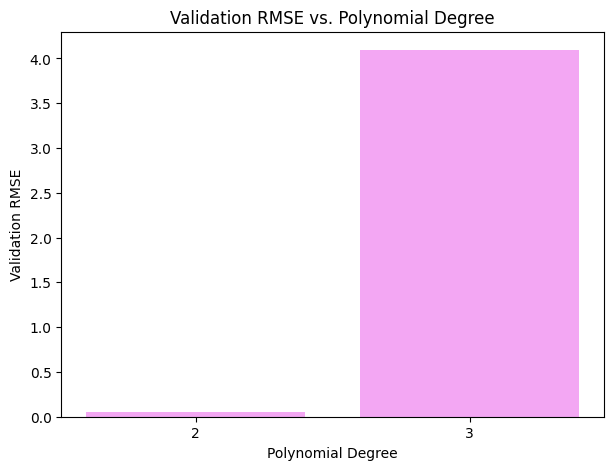

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

xt= pd.read_csv("loan-risk-predictor-main/One-Hot/MinMax/Train_MM_OH.csv").drop('LoanApproved',axis=1)
X_train=xt.iloc[:,:-1]
y_train=xt.iloc[:,-1]
xte=pd.read_csv("loan-risk-predictor-main/One-Hot/MinMax/Test_MM_OH.csv").drop('LoanApproved',axis=1)
X_test=xte.iloc[:,:-1]
y_test=xte.iloc[:,-1]
xv=pd.read_csv("loan-risk-predictor-main/One-Hot/MinMax/Valid_MM_OH.csv").drop('LoanApproved',axis=1)
X_valid=xv.iloc[:,:-1]
y_valid=xv.iloc[:,-1]



degrees = [2, 3]
rmse_train = []
rmse_val = []



best_degree = None
best_model = None
best_poly = None
lowest_val_rmse = float("inf")


for d in degrees:

    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_valid)


    model = LinearRegression()
    model.fit(X_train_poly, y_train)


    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)


    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_valid, y_val_pred))

    rmse_train.append(train_rmse)
    rmse_val.append(val_rmse)

    print(f"Degree {d} - Train RMSE: {train_rmse:.2f}, Validation RMSE: {val_rmse:.2f}")


    if val_rmse < lowest_val_rmse:
        lowest_val_rmse = val_rmse
        best_degree = d
        best_model = model
        best_poly = poly


plt.figure(figsize=(7, 5))
plt.bar(degrees, rmse_val, color='violet', alpha=0.7)
plt.xlabel("Polynomial Degree")
plt.ylabel("Validation RMSE")
plt.title("Validation RMSE vs. Polynomial Degree")
plt.xticks(degrees)
plt.show()





Best Polynomial Degree: 2
Test RMSE for best model: 0.06


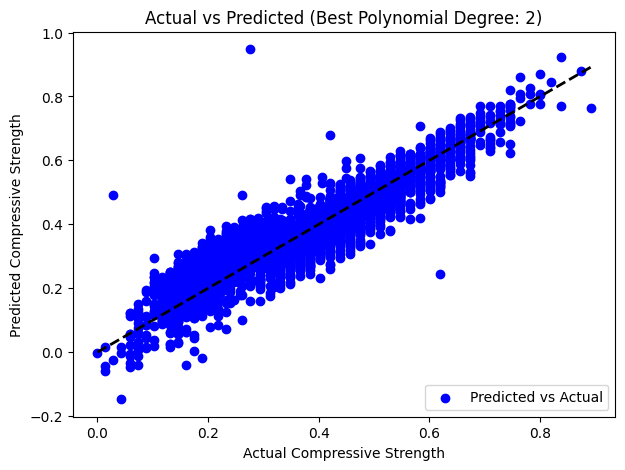

In [2]:

X_test_poly = best_poly.transform(X_test)
y_test_pred = best_model.predict(X_test_poly)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"\nBest Polynomial Degree: {best_degree}")
print(f"Test RMSE for best model: {test_rmse:.2f}")


plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_test_pred, c='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title(f"Actual vs Predicted (Best Polynomial Degree: {best_degree})")
plt.legend()
plt.show()